In [50]:
# import libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import time
from datetime import datetime
import seaborn as sns

## Bitcoin data

In [2]:
# read the data
df1 = pd.read_csv('BitCoinData.csv', parse_dates=['Date'])
df1.head()

,Date,price
0,2021-02-10,44918.183594
1,2021-02-11,47909.332031
2,2021-02-12,47504.851562
3,2021-02-13,47105.515625
4,2021-02-14,48717.289062


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    214 non-null    datetime64[ns]
 1   price   214 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.5 KB


In [4]:
# make a copy
df_btc = df1.copy()

In [5]:
# set date as index
df_btc= df_btc.set_index('Date')

In [6]:
df_btc.head()

,price
Date,
2021-02-10,44918.183594
2021-02-11,47909.332031
2021-02-12,47504.851562
2021-02-13,47105.515625
2021-02-14,48717.289062


## Twitter data

In [7]:
# read tweet pickle
df = pd.read_pickle("BitCoinTweets.pickle")

In [8]:
# show data
df.head()

,date,tweets,cleaned_tweets,subjectivity,polarity,sentiment
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,Neu
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,Neu
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,Neu
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,Neu
5,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,Pos


In [9]:
# create a new date column
df['date_dt']=pd.to_datetime(df.date, errors='coerce')

In [10]:
# check missing values
df['date_dt'].isna().sum()

6

In [11]:
# dropping subset
df=df.dropna(subset=['date_dt'], axis=0)

In [12]:
# double check na values
df['date_dt'].isna().sum()

0

In [13]:
# save clean tweets
pd.to_pickle(df, 'clean_tweets.pkl')

In [14]:
# read clean tweets
df_pickle = pd.read_pickle('clean_tweets.pkl')

In [15]:
# show data
df_pickle.head()

,date,tweets,cleaned_tweets,subjectivity,polarity,sentiment,date_dt
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,Neu,2021-02-10 23:59:04
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,Neu,2021-02-10 23:58:48
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,Neu,2021-02-10 23:54:33
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,Neu,2021-02-10 23:54:06
5,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,Pos,2021-02-10 23:53:30


In [16]:
df_pickle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1215994 entries, 0 to 1232808
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   date            1215994 non-null  object        
 1   tweets          1215994 non-null  object        
 2   cleaned_tweets  1215994 non-null  object        
 3   subjectivity    1215994 non-null  float64       
 4   polarity        1215994 non-null  float64       
 5   sentiment       1215994 non-null  object        
 6   date_dt         1215994 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 74.2+ MB


In [17]:
# make a copy
df_tweets= df_pickle.copy()

In [18]:
# drop the time stamp
df_tweets['date_dt']= pd.to_datetime(df_tweets['date_dt'].dt.date)

In [19]:
# set the datetime index
df_tweets=df_tweets.set_index('date_dt')

In [20]:
# drop date column
df_tweets = df_tweets.drop(columns=['date'])

In [21]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1215994 entries, 2021-02-10 to 2021-09-10
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tweets          1215994 non-null  object 
 1   cleaned_tweets  1215994 non-null  object 
 2   subjectivity    1215994 non-null  float64
 3   polarity        1215994 non-null  float64
 4   sentiment       1215994 non-null  object 
dtypes: float64(2), object(3)
memory usage: 55.7+ MB


In [22]:
df_tweets.head()

,tweets,cleaned_tweets,subjectivity,polarity,sentiment
date_dt,,,,,
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,Neu
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,Neu
2021-02-10,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,Neu
2021-02-10,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,Neu
2021-02-10,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,Pos


## Merge datasets

In [23]:
# merging the two datasets
df_merged = pd.merge(df_tweets, df_btc, how="left", left_index=True, right_index=True)

In [24]:
# checking for price missing values
df_merged.price.isna().sum()

14154

In [25]:
# drop subset
df_merged=df_merged.dropna(subset=['price'])

In [26]:
# show data
df_merged.head()

,tweets,cleaned_tweets,subjectivity,polarity,sentiment,price
2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,Neu,44918.183594
2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,Neu,44918.183594
2021-02-10,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,Neu,44918.183594
2021-02-10,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,Neu,44918.183594
2021-02-10,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,Pos,44918.183594


In [27]:
# return index into column name date_only
df_merged=df_merged.reset_index().rename(columns={'index': 'date_only'})

In [28]:
# rename the date column
df_merged = df_merged.rename(columns={'date_only': 'date'})

In [29]:
df_merged.head()

,date,tweets,cleaned_tweets,subjectivity,polarity,sentiment,price
0,2021-02-10,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.1,0.0,Neu,44918.183594
1,2021-02-10,"😎 Today, that's this #Thursday, we will do a ""...","😎 Today, that's this , we will do a ""🎬 Take 2""...",0.0,0.0,Neu,44918.183594
2,2021-02-10,$BTC A big chance in a billion! Price: \487264...,$BTC A big chance in a billion! Price: \487264...,0.1,0.0,Neu,44918.183594
3,2021-02-10,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.1,0.0,Neu,44918.183594
4,2021-02-10,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,💹 Trade on 📌 Enjoy 10% of the Trading fee📌 ...,0.5,0.4,Pos,44918.183594


In [30]:
df_merged = df_merged.drop(columns=['tweets', 'cleaned_tweets', 'sentiment'])
 

In [31]:
df_merged.to_csv('final_3.csv')

## Normalizing the series

In [32]:
# minmax scaler
def mn_scale(series):
    return (series - series.min()) / (series.max() - series.min())


In [33]:
# fitting the price into the MinMaxScaler
df_merged['price_norm'] =mn_scale(df_merged.price)

<AxesSubplot:xlabel='date'>

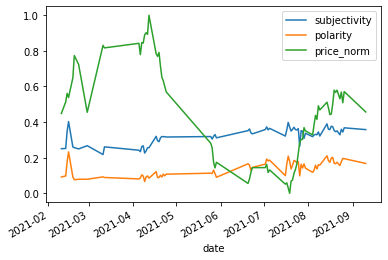

In [34]:
# plot the new dataframe
(df_merged
 .groupby('date')
 .agg({'subjectivity': 'mean', 'polarity': 'mean', 'price_norm': 'mean'})
 #.reset_index()
 .plot()
)

## EDA

In [35]:
# make a copy
df = df_merged.copy()

In [36]:
df.set_index('date', inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1201840 entries, 2021-02-10 to 2021-09-10
Data columns (total 4 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   subjectivity  1201840 non-null  float64
 1   polarity      1201840 non-null  float64
 2   price         1201840 non-null  float64
 3   price_norm    1201840 non-null  float64
dtypes: float64(4)
memory usage: 45.8 MB


In [38]:
df = df.drop(columns=['polarity', 'price'])

In [39]:
df

,subjectivity,price_norm
date,,
2021-02-10,0.100,0.448445
2021-02-10,0.000,0.448445
2021-02-10,0.100,0.448445
2021-02-10,0.100,0.448445
2021-02-10,0.500,0.448445
...,...,...
2021-09-10,0.000,0.456851
2021-09-10,0.600,0.456851
2021-09-10,1.000,0.456851


In [40]:
df.describe()

,subjectivity,price_norm
count,1.201840e+06,1.201840e+06
mean,3.469778e-01,3.343259e-01
std,3.116652e-01,2.126350e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,1.314053e-01
50%,3.500000e-01,3.688319e-01
75%,5.833333e-01,5.018452e-01
max,1.000000e+00,1.000000e+00


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1201840 entries, 2021-02-10 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   subjectivity  1201840 non-null  float64
 1   price_norm    1201840 non-null  float64
dtypes: float64(2)
memory usage: 27.5 MB


In [42]:
df.to_csv('final_data.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1201840 entries, 2021-02-10 to 2021-09-10
Data columns (total 2 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   subjectivity  1201840 non-null  float64
 1   price_norm    1201840 non-null  float64
dtypes: float64(2)
memory usage: 27.5 MB


In [63]:
df['subjectivity']

date
2021-02-10    0.100
2021-02-10    0.000
2021-02-10    0.100
2021-02-10    0.100
2021-02-10    0.500
              ...  
2021-09-10    0.000
2021-09-10    0.600
2021-09-10    1.000
2021-09-10    0.225
2021-09-10    0.750
Name: subjectivity, Length: 1201840, dtype: float64

## Modelling

In [ ]:
#plot

 serie,=plt.plot(scaler.inverse_transform(dataset)[:,2])  
prediccion_entrenamiento,=plt.plot(trainPredictPlot[:,2],linestyle='--')  
prediccion_test,=plt.plot(testPredictPlot[:,2],linestyle='--')
plt.title('Consumo de agua')
plt.ylabel('cosumo (m3)')
plt.xlabel('dia')
plt.legend([serie,prediccion_entrenamiento,prediccion_test],['serie','entrenamiento','test'], loc='upper right')

### Weighted Price as a feature to train LSTM model

In [64]:
# Use MinMaxScaler to normalize Weighted Price to range from 0 to 1
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
values = df['price_norm'].values.reshape(-1,1)
subjectivity = df['subjectivity'].values.reshape(-1,1)
values = values.astype('float32')
subjectivity = subjectivity.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [65]:
# Split 70% of data for training and 30% for testing

train_size = int(len(scaled) * 0.7)
test_size = len(scaled) - train_size
train, test = scaled[0:train_size,:], scaled[train_size:len(scaled),:]
print(len(train), len(test))
split = train_size

841288 360552


In [66]:
# Create function for creating dataset with look back

def create_dataset(dataset, look_back, subjectivity):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        np.append(a,subjectivity[i])
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    print(len(dataY))
    return np.array(dataX), np.array(dataY)

In [67]:
look_back = 1
X_train, Y_train = create_dataset(train, look_back, subjectivity[0:train_size])
X_test, Y_test = create_dataset(test, look_back, subjectivity[train_size:len(scaled)])


841287
360551


In [68]:
X_train.shape

(841287, 1)

In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [70]:
# import keras libraries
from tensorflow.keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

NotImplementedError: Cannot convert a symbolic Tensor (lstm_1/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported